In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt


# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/SPEDATATHON/GHG.xlsx')

# Assume full dataset from 1971 to 2022 for Energy Emissions
yearly_emissions = pd.DataFrame({
    'Year': np.arange(1971, 2023),
    'Energy Emissions': [value for value in range(1500, 2500)]  # Replace with actual data
})

# Set 'Year' as index
yearly_emissions.set_index('Year', inplace=True)

# Build SARIMA model for Energy Emissions
model = SARIMAX(yearly_emissions['Energy Emissions'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# Make prediction for the next 10 years (2023-2032)
forecast = model_fit.forecast(steps=10)

# Create future year range for plotting
future_years = np.arange(2023, 2033)

# Plot historical and forecasted emissions
plt.figure(figsize=(10, 6))
plt.plot(yearly_emissions.index, yearly_emissions['Energy Emissions'], label='Historical Energy Emissions')
plt.plot(future_years, forecast, label='Forecasted Energy Emissions', linestyle='--', color='red')
plt.title('Energy Emissions: Historical vs Projected')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (Mt)')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-i

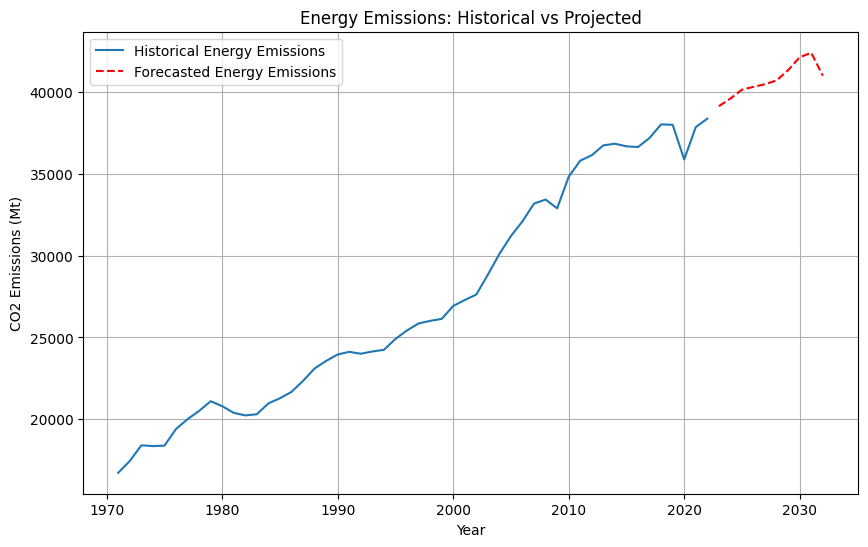

In [6]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Load the dataset
GHGemission = pd.read_excel('/content/drive/MyDrive/SPEDATATHON/GHGemission.xlsx')

# Assuming GHGemission is already loaded as a DataFrame
# Extract the 'GHG Energy' row and set it for time-series modeling
ghg_energy = GHGemission.iloc[0, 1:].values  # Get values from the second column onwards (1971-2022)
years = np.arange(1971, 2023)  # Year range from 1971 to 2022

# Create a pandas DataFrame for the time-series data
ghg_energy_df = pd.DataFrame({'Year': years, 'Energy Emissions': ghg_energy})

# Set 'Year' as index
ghg_energy_df.set_index('Year', inplace=True)

ghg_energy_df['Energy Emissions'] = pd.to_numeric(ghg_energy_df['Energy Emissions'], errors='coerce')

# Build SARIMA model for Energy Emissions (adjusting orders for your dataset)
model = SARIMAX(ghg_energy_df['Energy Emissions'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# Make prediction for the next 10 years (2023-2032)
forecast = model_fit.forecast(steps=10)

# Create future year range for plotting
future_years = np.arange(2023, 2033)

# Plot historical and forecasted emissions
plt.figure(figsize=(10, 6))
plt.plot(ghg_energy_df.index, ghg_energy_df['Energy Emissions'], label='Historical Energy Emissions')
plt.plot(future_years, forecast, label='Forecasted Energy Emissions', linestyle='--', color='red')
plt.title('Energy Emissions: Historical vs Projected')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (Mt)')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-station

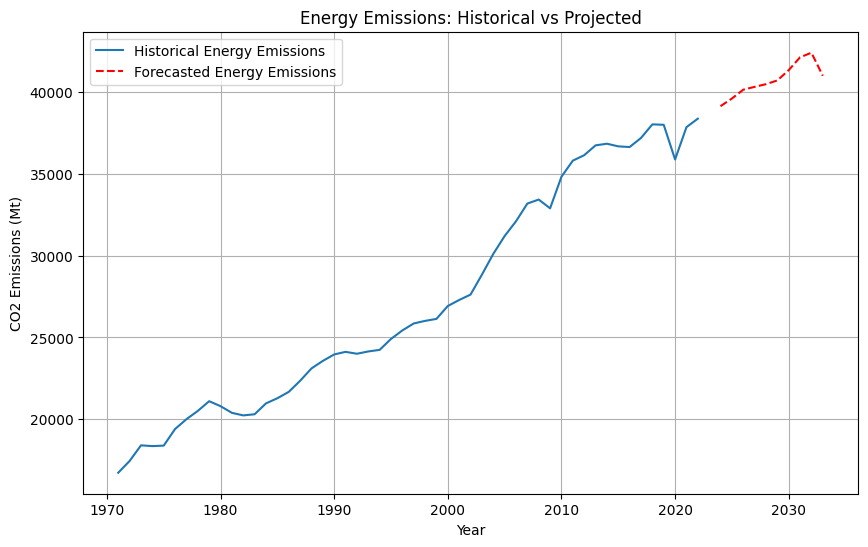

In [7]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Assuming GHGemission is already loaded as a DataFrame
# Extract the 'GHG Energy' row and set it for time-series modeling
ghg_energy = GHGemission.iloc[0, 1:].values  # Get values from the second column onwards (1971-2022)
years = np.arange(1971, 2023)  # Year range from 1971 to 2022

# Create a pandas DataFrame for the time-series data
ghg_energy_df = pd.DataFrame({'Year': years, 'Energy Emissions': ghg_energy})

# Convert 'Year' to datetime
ghg_energy_df['Year'] = pd.to_datetime(ghg_energy_df['Year'], format='%Y')

# Set 'Year' as the index
ghg_energy_df.set_index('Year', inplace=True)

# Convert Energy Emissions to numeric in case of any data type issues
ghg_energy_df['Energy Emissions'] = pd.to_numeric(ghg_energy_df['Energy Emissions'], errors='coerce')

# Build SARIMA model for Energy Emissions
model = SARIMAX(ghg_energy_df['Energy Emissions'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# Make prediction for the next 10 years
forecast = model_fit.forecast(steps=10)

# Create future year range for plotting
future_years = pd.date_range(start='2023', periods=10, freq='Y')

# Plot historical and forecasted emissions
plt.figure(figsize=(10, 6))
plt.plot(ghg_energy_df.index, ghg_energy_df['Energy Emissions'], label='Historical Energy Emissions')
plt.plot(future_years, forecast, label='Forecasted Energy Emissions', linestyle='--', color='red')
plt.title('Energy Emissions: Historical vs Projected')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (Mt)')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(ghg_energy_df['Energy Emissions'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If p-value > 0.05, the data is not stationary, and differencing might be needed.


ADF Statistic: -0.10033484578143341
p-value: 0.9494051713442062


In [13]:
pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.5 MB/s eta 0:00:00


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=805.484, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=808.220, Time=0.30 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=807.401, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=822.781, Time=0.02 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=806.253, Time=0.15 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=805.438, Time=0.13 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=806.080, Time=0.64 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=808.029, Time=1.86 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=807.426, Time=0.75 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=809.321, Time=0.95 sec
 ARIMA(0,0,0)(0,0,1)[12]             : AIC=822.450, Time=0.42 sec

Best model:  ARIMA(0,0,0)(0,0,1)[12] intercept
Total fit time: 6.714 seconds


<ipython-input-19-e9a0a2a70cb7>:37: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start='2023', periods=10, freq='Y')


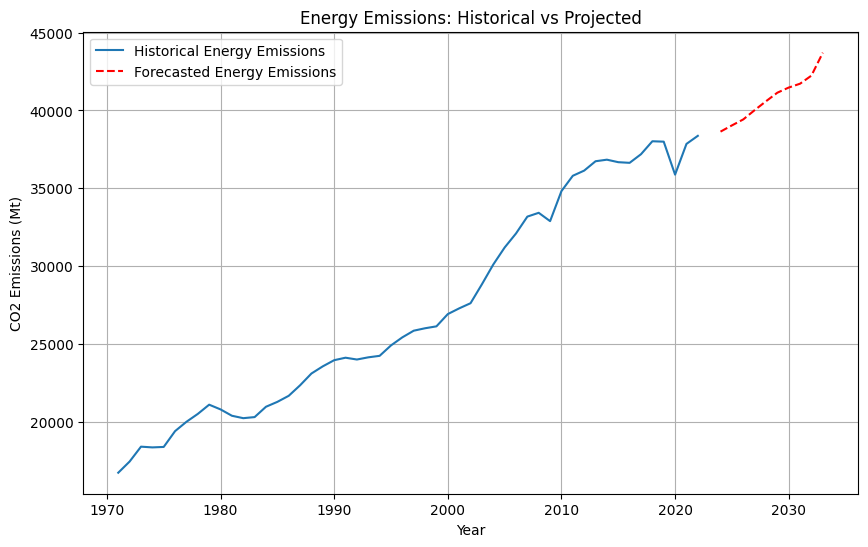

In [19]:
import pmdarima as pm


# Assuming GHGemission is already loaded as a DataFrame
# Extract the 'GHG Energy' row and set it for time-series modeling
ghg_energy = GHGemission.iloc[0, 1:].values  # Get values from the second column onwards (1971-2022)
years = np.arange(1971, 2023)  # Year range from 1971 to 2022

# Create a pandas DataFrame for the time-series data
ghg_energy_df = pd.DataFrame({'Year': years, 'Energy Emissions': ghg_energy})

# Convert 'Year' to datetime
ghg_energy_df['Year'] = pd.to_datetime(ghg_energy_df['Year'], format='%Y')

# Set 'Year' as the index
ghg_energy_df.set_index('Year', inplace=True)

# Convert Energy Emissions to numeric in case of any data type issues
ghg_energy_df['Energy Emissions'] = pd.to_numeric(ghg_energy_df['Energy Emissions'], errors='coerce')

# Apply first-order differencing to make the data stationary
ghg_energy_diff = ghg_energy_df['Energy Emissions'].diff().dropna()

# Use auto_arima to automatically select the best parameters
auto_model = pm.auto_arima(ghg_energy_diff, seasonal=True, m=12, trace=True)

# Fit the model
auto_model_fit = auto_model.fit(ghg_energy_diff)

# Make forecast for the next 10 years
forecast_diff = auto_model_fit.predict(n_periods=10)

# Undo the differencing to get back to original scale
forecast = ghg_energy_df['Energy Emissions'].iloc[-1] + np.cumsum(forecast_diff)

# Plot as before
future_years = pd.date_range(start='2023', periods=10, freq='Y')
plt.figure(figsize=(10, 6))
plt.plot(ghg_energy_df.index, ghg_energy_df['Energy Emissions'], label='Historical Energy Emissions')
plt.plot(future_years, forecast, label='Forecasted Energy Emissions', linestyle='--', color='red')
plt.title('Energy Emissions: Historical vs Projected')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (Mt)')
plt.legend()
plt.grid(True)
plt.show()


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=799.636, Time=0.90 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=794.229, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=796.725, Time=1.83 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=795.717, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=813.282, Time=0.04 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=794.739, Time=0.98 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=793.731, Time=0.10 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=794.404, Time=0.30 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=796.359, Time=0.57 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=795.733, Time=0.17 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=797.645, Time=0.24 sec
 ARIMA(0,0,0)(0,0,1)[12]             : AIC=812.816, Time=0.08 sec

Best model:  ARIMA(0,0,0)(0,0,1)[12] intercept
Total fit time: 5.998 seconds


<ipython-input-25-58fc7e25ffca>:37: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start='2023', periods=10, freq='Y')


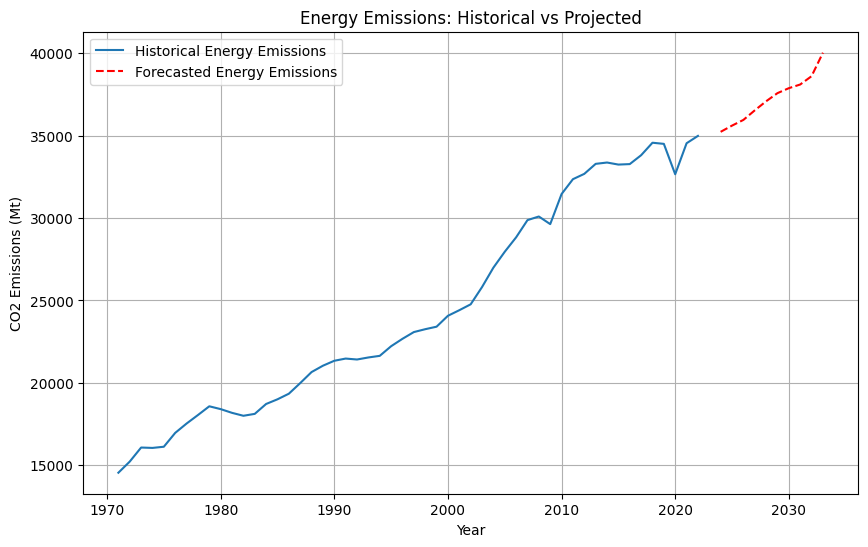

In [25]:
import pmdarima as pm


# Assuming GHGemission is already loaded as a DataFrame
# Extract the 'GHG Energy' row and set it for time-series modeling
ghg_energy = GHGemission.iloc[2, 1:].values  # Get values from the second column onwards (1971-2022)
years = np.arange(1971, 2023)  # Year range from 1971 to 2022

# Create a pandas DataFrame for the time-series data
ghg_energy_df = pd.DataFrame({'Year': years, 'Energy Emissions': ghg_energy})

# Convert 'Year' to datetime
ghg_energy_df['Year'] = pd.to_datetime(ghg_energy_df['Year'], format='%Y')

# Set 'Year' as the index
ghg_energy_df.set_index('Year', inplace=True)

# Convert Energy Emissions to numeric in case of any data type issues
ghg_energy_df['Energy Emissions'] = pd.to_numeric(ghg_energy_df['Energy Emissions'], errors='coerce')

# Apply first-order differencing to make the data stationary
ghg_energy_diff = ghg_energy_df['Energy Emissions'].diff().dropna()

# Use auto_arima to automatically select the best parameters
auto_model = pm.auto_arima(ghg_energy_diff, seasonal=True, m=12, trace=True)

# Fit the model
auto_model_fit = auto_model.fit(ghg_energy_diff)

# Make forecast for the next 10 years
forecast_diff = auto_model_fit.predict(n_periods=10)

# Undo the differencing to get back to original scale
forecast = ghg_energy_df['Energy Emissions'].iloc[-1] + np.cumsum(forecast_diff)

# Plot as before
future_years = pd.date_range(start='2023', periods=10, freq='Y')
plt.figure(figsize=(10, 6))
plt.plot(ghg_energy_df.index, ghg_energy_df['Energy Emissions'], label='Historical Energy Emissions')
plt.plot(future_years, forecast, label='Forecasted Energy Emissions', linestyle='--', color='red')
plt.title('Energy Emissions: Historical vs Projected')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (Mt)')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-i

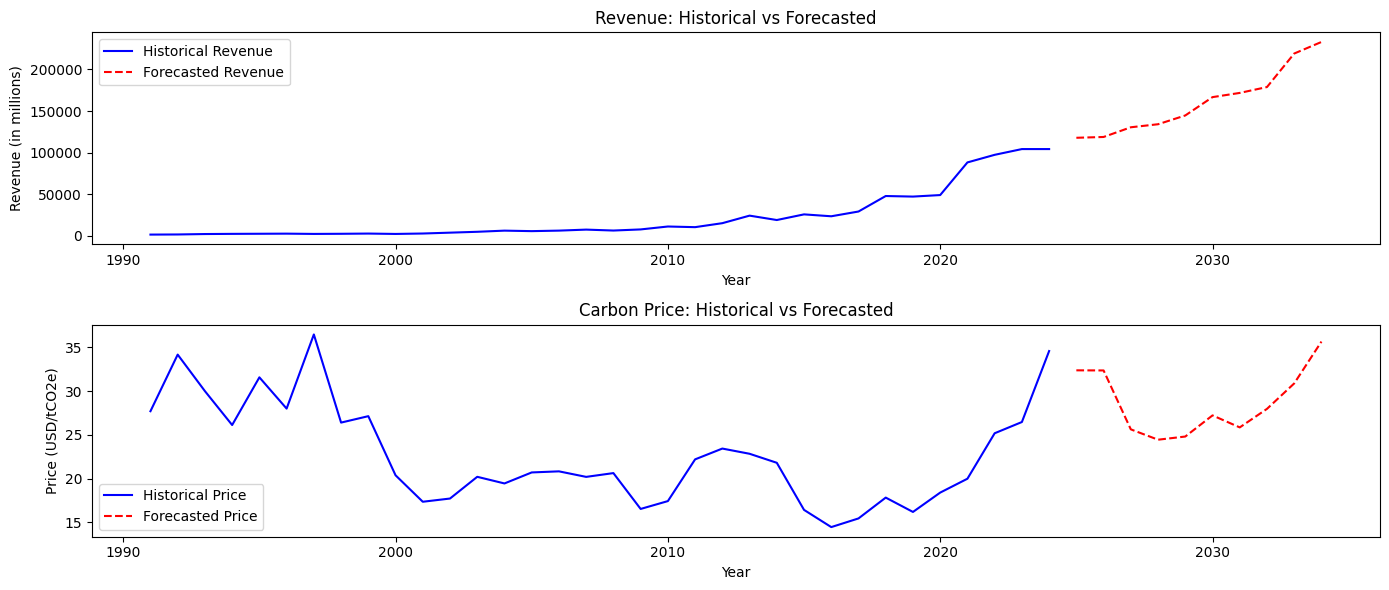

In [27]:
# Import necessary libraries
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '/content/drive/MyDrive/SPEDATATHON/OffsetRevenueNPrice.xlsx'
df = pd.read_excel(file_path)

# Set Year as index (assuming the columns are named 'Year', 'Revenue', and 'Price')
df.set_index('Year', inplace=True)

# Create SARIMA models for Revenue and Price
# You can adjust the (p, d, q) parameters as needed

# Revenue model
revenue_model = SARIMAX(df['Revenue'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
revenue_model_fit = revenue_model.fit(disp=False)

# Price model
price_model = SARIMAX(df['Price'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
price_model_fit = price_model.fit(disp=False)

# Forecast future values for the next 10 years
revenue_forecast = revenue_model_fit.forecast(steps=10)
price_forecast = price_model_fit.forecast(steps=10)

# Generate a future year index for plotting
future_years = pd.Series(range(df.index[-1] + 1, df.index[-1] + 11))

# Plot historical and forecasted data side by side

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(14, 6))

# Subplot for Revenue
ax[0].plot(df.index, df['Revenue'], label='Historical Revenue', color='blue')
ax[0].plot(future_years, revenue_forecast, label='Forecasted Revenue', linestyle='--', color='red')
ax[0].set_title('Revenue: Historical vs Forecasted')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Revenue (in millions)')
ax[0].legend()

# Subplot for Price
ax[1].plot(df.index, df['Price'], label='Historical Price', color='blue')
ax[1].plot(future_years, price_forecast, label='Forecasted Price', linestyle='--', color='red')
ax[1].set_title('Carbon Price: Historical vs Forecasted')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Price (USD/tCO2e)')
ax[1].legend()

plt.tight_layout()
plt.show()
